In [437]:
import pandas as pd 
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(width=41,depth=6, compact=True)




from sklearn.ensemble import RandomForestRegressor

In [271]:
path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)

for i in range(18):
   # li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))#.apply(lambda x: float(x))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: float(x))
    
maksili=[]
for i in range(18):
    maks=float(li[i]['Güneş'].max())
    maksili.append(maks)
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x/maksili[i])
    

data = pd.concat(li, axis=0, ignore_index=True)

data['Tarihsaat']=pd.to_datetime(data['Tarih']+' '+data['Saat'])
data=data.set_index('Tarihsaat')
data


,Tarih,Saat,Güneş,GES
Tarihsaat,,,,
2019-09-26 00:00:00,26.09.2019,00:00,0.000000,AFTA
2019-09-26 01:00:00,26.09.2019,01:00,0.000000,AFTA
2019-09-26 02:00:00,26.09.2019,02:00,0.000000,AFTA
2019-09-26 03:00:00,26.09.2019,03:00,0.000000,AFTA
2019-09-26 04:00:00,26.09.2019,04:00,0.000000,AFTA
...,...,...,...,...
2020-07-31 18:00:00,31.07.2020,18:00,0.104463,YAYSUN
2020-07-31 19:00:00,31.07.2020,19:00,0.008547,YAYSUN
2020-07-31 20:00:00,31.07.2020,20:00,0.000000,YAYSUN


In [272]:
data['GES'].unique()

array(['AFTA', 'ALIBEY', 'ALIBEYHOYUGU', 'APA', 'CINGILLI', 'DENIZLI',
       'HALK', 'HAMAL', 'ME', 'MT', 'OMICRONENGIL', 'OMICRONERCIS', 'PSI',
       'RA', 'RENOE', 'SOLANA', 'SOLENTEGRE', 'YAYSUN'], dtype=object)

Filtered : https://www.enerjiatlasi.com/ges-yarisma.html


	Cıngıllı     	Niğde	26 MW
    Alibeyhöyüğü 	Konya   18 MW
    Konya APA   	Konya	13 MW
    Renoe Acıpayam 	Denizli	10 MW
    
    Konya Afta  	Konya	9,80 MW
    
    Hamal       	Sivas	9,00 MW
    Solentegre      Elazığ	8,00 MW
    
    RA          	Mardin	9,00 MW
    Omicron Erciş 	Van		9,95 MW
   

In [513]:
def train_test(df):
    train_start=df.index[(-91*24)-23]
    train_stop=df.index[(-62*24)+25]
    
    test_start=df.index[(-60*24)-23]
    test_stop=df.index[(-32*24)+25]
    
    return train_start,train_stop

In [514]:
#starter='2020-05-01'
#stoper = '2020-06-01'
starter='2020-01-01'
stoper='2020-06-01'

In [548]:
def ges_ayar(df):
    A=df['Güneş'].values
    dates=pd.date_range(start='2020-05-01',end='2020-06-01',freq='H')
    z=pd.DataFrame()
    z['Güneş']=A
    z=z.set_index(dates)
    df=z.copy()
    plt.figure(figsize=(15,4))
    df['Güneş'].plot()
    return df

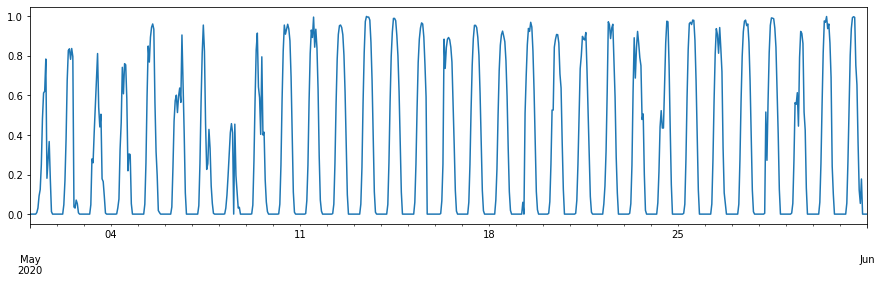

In [549]:
data_cin=data[data['GES']=='CINGILLI']
train_start,train_stop=train_test(data_cin)
data_cin=data_cin[train_start:train_stop]
data_cin=ges_ayar(data_cin)


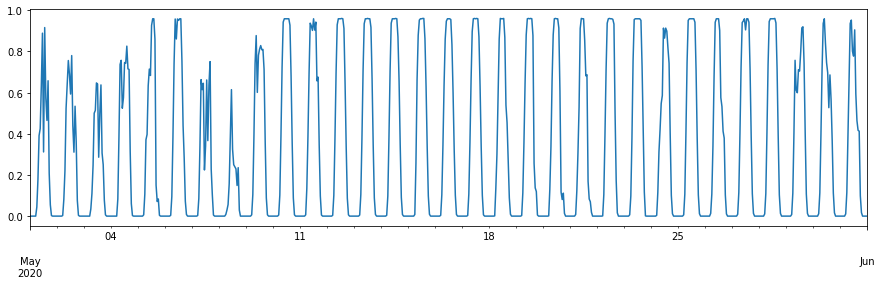

In [550]:
data_ali=data[data['GES']=='ALIBEYHOYUGU']
train_start,train_stop=train_test(data_ali)
data_ali=data_ali[train_start:train_stop]

data_ali=ges_ayar(data_ali)


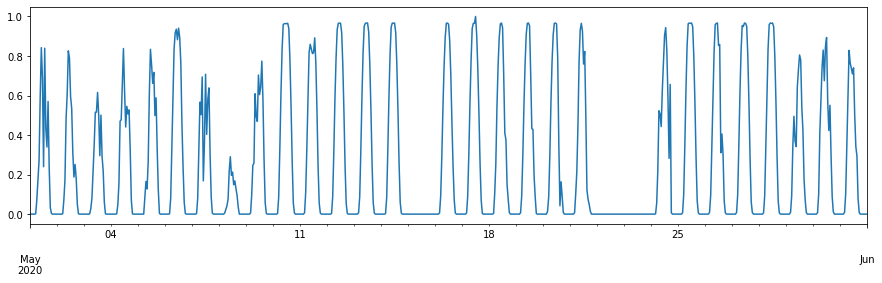

In [551]:
data_apa=data[data['GES']=='APA']
train_start,train_stop=train_test(data_apa)
data_apa=data_apa[train_start:train_stop]

data_apa=ges_ayar(data_apa)


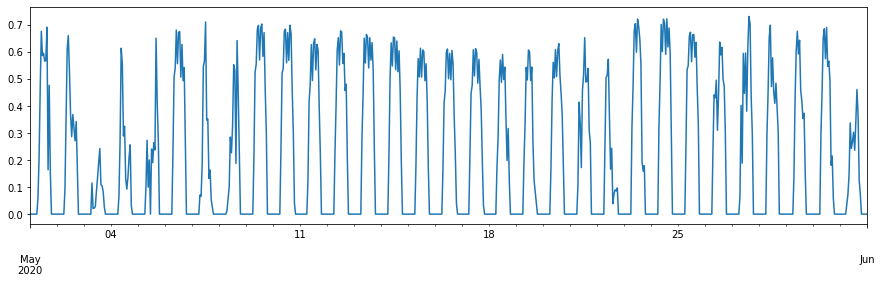

In [552]:
data_ren=data[data['GES']=='RENOE']
train_start,train_stop=train_test(data_ren)
data_ren=data_ren[train_start:train_stop]

data_ren=ges_ayar(data_ren)


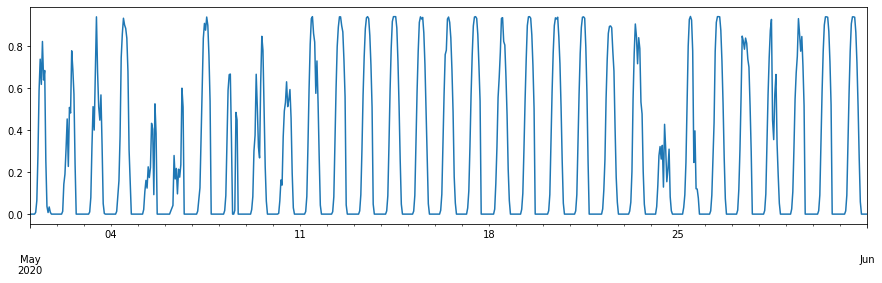

In [553]:
data_omc1=data[data['GES']=='OMICRONENGIL']
train_start,train_stop=train_test(data_omc1)
data_omc1=data_omc1[train_start:train_stop]
data_omc1=ges_ayar(data_omc1)


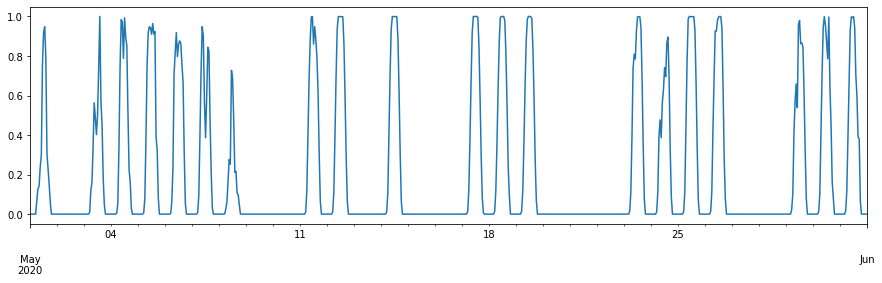

In [554]:
data_aft=data[data['GES']=='AFTA']
train_start,train_stop=train_test(data_aft)
data_aft=data_aft[train_start:train_stop]
data_aft=ges_ayar(data_aft)

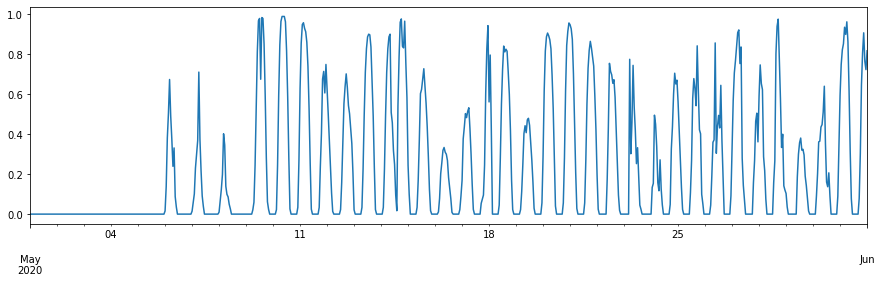

In [555]:
data_ham=data[data['GES']=='HAMAL']
train_start,train_stop=train_test(data_ham)
data_ham=data_ham[train_start:train_stop]
data_ham=ges_ayar(data_ham)

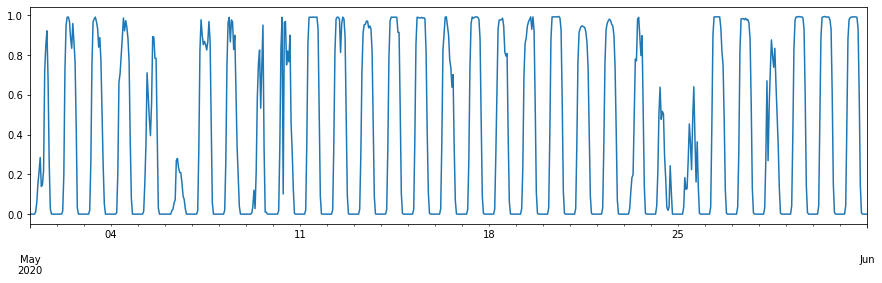

In [556]:
data_ra=data[data['GES']=='RA']
train_start,train_stop=train_test(data_ra)
data_ra=data_ra[train_start:train_stop]
data_ra=ges_ayar(data_ra)

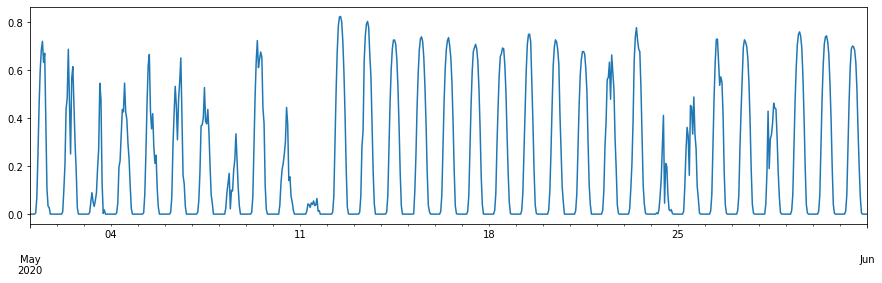

In [557]:
data_so=data[data['GES']=='SOLENTEGRE']
train_start,train_stop=train_test(data_so)
data_so=data_so[train_start:train_stop]
data_so=ges_ayar(data_so)

In [558]:
#data_halk=data[data['GES']=='HALK']
#train_start,train_stop=train_test(data_halk)
#data_halk=data_halk[train_start:train_stop]

#data_halk=ges_ayar(data_halk)


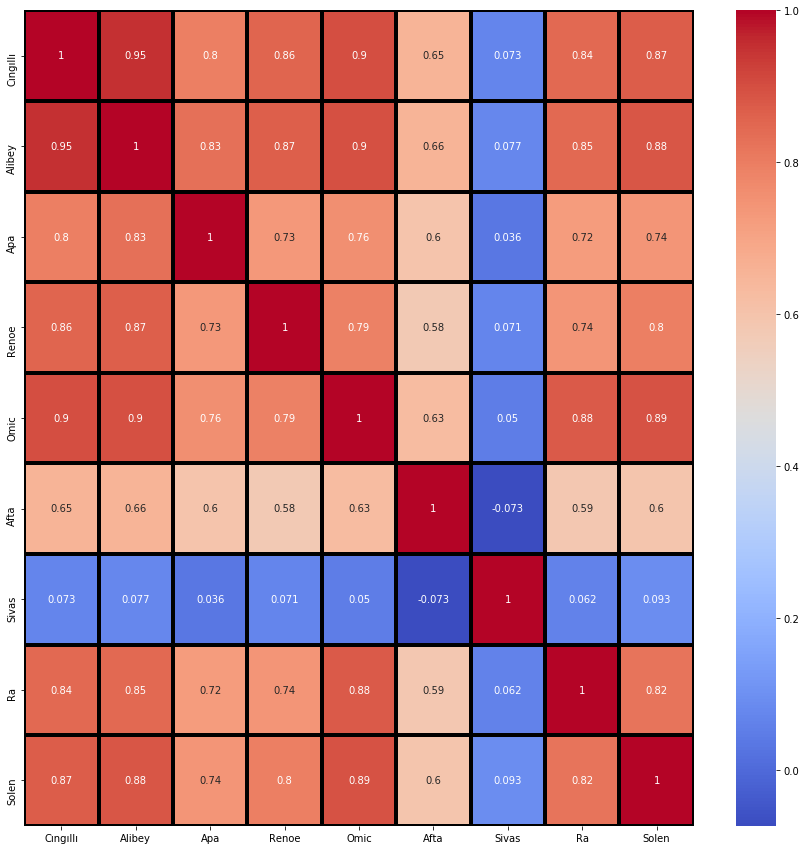

In [559]:
turkiye=pd.concat([data_cin,data_ali,data_apa,data_ren,data_omc1,data_aft,data_ham,data_ra,data_so],join='outer',axis=1)#,left_index=True, right_index=True)1
turkiye.columns=['Cıngıllı','Alibey','Apa','Renoe','Omic','Afta','Sivas','Ra','Solen']
plt.figure(figsize=(15,15))
sns.heatmap(turkiye.corr(),annot = True,cmap= 'coolwarm', linewidths=3, linecolor='black')

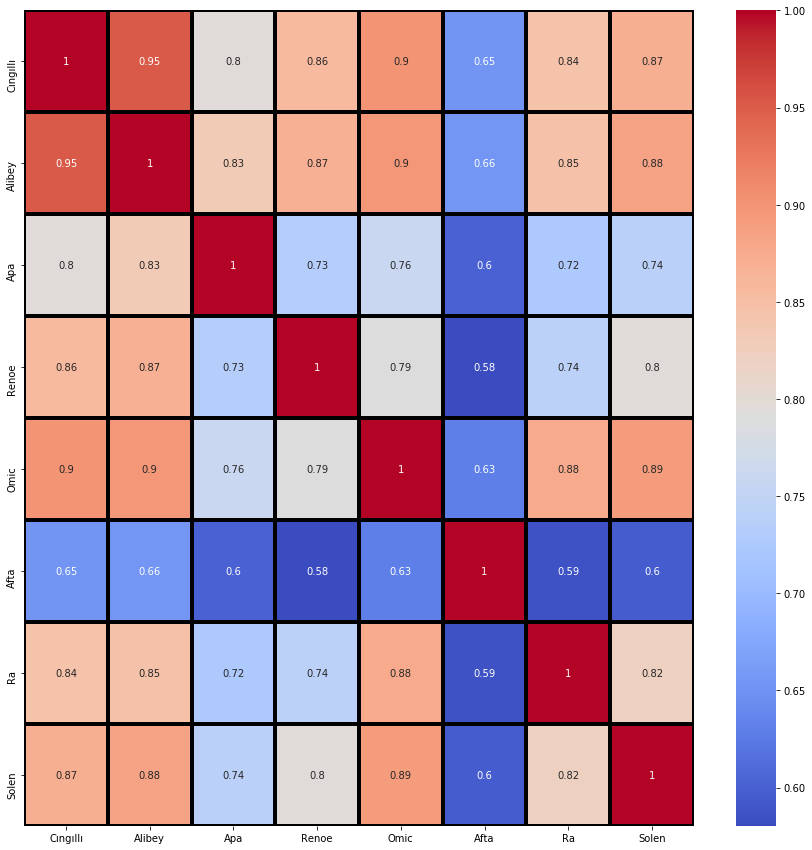

In [560]:
turkiye=pd.concat([data_cin,data_ali,data_apa,data_ren,data_omc1,data_aft,data_ra,data_so],join='outer',axis=1)#,left_index=True, right_index=True)1
turkiye.columns=['Cıngıllı','Alibey','Apa','Renoe','Omic','Afta','Ra','Solen']
plt.figure(figsize=(15,15))
sns.heatmap(turkiye.corr(),annot = True,cmap= 'coolwarm', linewidths=3, linecolor='black')

In [561]:
def il_cor(ges1,ges2,ad):
    y=pd.merge(ges1,ges2,how='outer',left_index=True, right_index=True)
    print("----------------------------")
    print(ad)
    print("----------------------------")
    print(y.corr())
    print("----------------------------")
    return

### Hava Durumu Verileri

In [529]:
wr=pd.read_csv('C:/Users\Ahmet YÜKSEL/Desktop/Algopoly Belgeler/trweather.csv')
wr.head()


,loc,forecast_epoch,DSWRF_surface,TMP_2.m.above.ground
0,LOCATION1,1421290800,0.0,271.34
1,LOCATION1,1421301600,0.0,272.10
2,LOCATION1,1421312400,180.0,273.65
3,LOCATION1,1421323200,270.0,274.10
4,LOCATION1,1421334000,170.0,270.20


In [530]:
wr=wr.rename(columns={"loc": "Yer", "forecast_epoch": "Time", "DSWRF_surface": "Rad","TMP_2.m.above.ground":"Temp"})
wr['Temp']=wr['Temp'].map(lambda x:x-273.15) #convert to celcius


#### Santrallere Göre Ayırma

In [531]:
locs=wr['Yer'].unique()

wr1=wr[wr['Yer']==locs[0]]
wr1=wr1.drop('Yer',axis=1)

wr2=wr[wr['Yer']==locs[1]]
wr2=wr2.drop('Yer',axis=1)

wr3=wr[wr['Yer']==locs[2]]
wr3=wr3.drop('Yer',axis=1)

wr4=wr[wr['Yer']==locs[3]]
wr4=wr4.drop('Yer',axis=1)

wr5=wr[wr['Yer']==locs[4]]
wr5=wr5.drop('Yer',axis=1)

wr6=wr[wr['Yer']==locs[5]]
wr6=wr6.drop('Yer',axis=1)

wr7=wr[wr['Yer']==locs[6]]
wr7=wr7.drop('Yer',axis=1)


In [532]:
wr1.iloc[-62:-31].shape

(31, 3)

### Son İki Ay Verisini Ayırma

In [533]:
def son_iki(df):
    iki=df.iloc[-30*24-2-7:25558-7]
    bir=df.iloc[(-62*24)-3-6:-31*24-2-6]
    
    return bir,iki

In [534]:
a,b=son_iki(wr1)
print(a.shape)

print(b.shape)
print(dates.shape)

(745, 3)
(721, 3)
(745,)


In [535]:
def wr_ayar(df):
    df1,df2=son_iki(df)
    A=df1['Rad'].values
    B=df1['Temp'].values
    C=df2['Rad'].values
    D=df2['Temp'].values
    dates=pd.date_range(start='2020-05-01',end='2020-06-01',freq='H')
    dates2=pd.date_range(start='2020-06-01',end='2020-07-01',freq='H')
    z=pd.DataFrame()
    q=pd.DataFrame()
    z['Rad']=A
    z['Temp']=B
    z=z.set_index(dates)
    q['Rad']=C
    q['Temp']=D
    q=q.set_index(dates2)
    df1=z.copy()
    df2=q.copy()
    ##fig, axs = plt.subplots(2, 2,figsize=(14,10))
    
    
    ##axs[0, 0].plot(dates, df1['Rad'])
    ##axs[0, 0].set_title('Training Radyal')
    ##axs[0, 1].plot(dates, df1['Temp'], 'tab:orange')
    ##axs[0, 1].set_title('Training Temp')
    ##axs[1, 0].plot(df2.index, df2['Rad'], 'tab:green')
    ##axs[1, 0].set_title('Test Radyal')
    ##axs[1, 1].plot(df2.index, df2['Temp'], 'tab:red')
    ##axs[1, 1].set_title('Test Temp')
   
    return df1,df2

In [536]:
wr1_train,wr1_test=wr_ayar(wr1)

wr2_train,wr2_test=wr_ayar(wr2)

wr3_train,wr3_test=wr_ayar(wr3)

wr4_train,wr4_test=wr_ayar(wr4)

wr5_train,wr5_test=wr_ayar(wr5)

wr6_train,wr6_test=wr_ayar(wr6)

wr7_train,wr7_test=wr_ayar(wr7)

In [537]:
def wr_en(weather,ges,ad):
    z=pd.merge(weather,ges,how='outer',left_index=True, right_index=True)
   # print("----------------------------")
    #print(ad)
    #print("----------------------------")
    #pp.pprint(z.corr())
    x=pd.DataFrame(z.corr())
   # plt.figure(figsize=(15,15))
    #sns.heatmap(z.corr(),annot = True,cmap= 'coolwarm', linewidths=3, linecolor='black')
    #print("----------------------------")
    return x

In [538]:
x1=wr_en(wr1_train,turkiye,'Location 1 Nerede')
x2=wr_en(wr2_train,turkiye,'Location 2 Nerede')
x3=wr_en(wr3_train,turkiye,'Location 3 Nerede')
x4=wr_en(wr4_train,turkiye,'Location 4 Nerede')
x5=wr_en(wr5_train,turkiye,'Location 5 Nerede')
x6=wr_en(wr6_train,turkiye,'Location 6 Nerede')
x7=wr_en(wr7_train,turkiye,'Location 7 Nerede')


In [539]:
a=pd.concat([x1,x2,x3,x4,x5,x6,x7],join='outer',axis=1)
a

,Rad,Temp,Cıngıllı,Alibey,Apa,Renoe,Omic,Afta,Ra,Solen,...,Rad,Temp,Cıngıllı,Alibey,Apa,Renoe,Omic,Afta,Ra,Solen
Rad,1.000000,0.784865,0.828781,0.808763,0.615289,0.794305,0.763625,0.582388,0.724850,0.735326,...,1.000000,0.732384,0.771883,0.748544,0.542895,0.758816,0.693545,0.551504,0.671558,0.667603
Temp,0.784865,1.000000,0.774767,0.769879,0.612184,0.750738,0.730588,0.531771,0.726146,0.697183,...,0.732384,1.000000,0.594723,0.577382,0.405917,0.595595,0.539644,0.425701,0.515739,0.517970
Cıngıllı,0.828781,0.774767,1.000000,0.951485,0.796280,0.855893,0.901399,0.652752,0.844964,0.872047,...,0.771883,0.594723,1.000000,0.951485,0.796280,0.855893,0.901399,0.652752,0.844964,0.872047
Alibey,0.808763,0.769879,0.951485,1.000000,0.831170,0.869216,0.896783,0.655079,0.847549,0.884969,...,0.748544,0.577382,0.951485,1.000000,0.831170,0.869216,0.896783,0.655079,0.847549,0.884969
Apa,0.615289,0.612184,0.796280,0.831170,1.000000,0.733443,0.760372,0.601587,0.723457,0.740285,...,0.542895,0.405917,0.796280,0.831170,1.000000,0.733443,0.760372,0.601587,0.723457,0.740285
Renoe,0.794305,0.750738,0.855893,0.869216,0.733443,1.000000,0.790476,0.580364,0.741289,0.795823,...,0.758816,0.595595,0.855893,0.869216,0.733443,1.000000,0.790476,0.580364,0.741289,0.795823
Omic,0.763625,0.730588,0.901399,0.896783,0.760372,0.790476,1.000000,0.630935,0.876904,0.892532,...,0.693545,0.539644,0.901399,0.896783,0.760372,0.790476,1.000000,0.630935,0.876904,0.892532
Afta,0.582388,0.531771,0.652752,0.655079,0.601587,0.580364,0.630935,1.000000,0.585508,0.595244,...,0.551504,0.425701,0.652752,0.655079,0.601587,0.580364,0.630935,1.000000,0.585508,0.595244
Ra,0.724850,0.726146,0.844964,0.847549,0.723457,0.741289,0.876904,0.585508,1.000000,0.821759,...,0.671558,0.515739,0.844964,0.847549,0.723457,0.741289,0.876904,0.585508,1.000000,0.821759
Solen,0.735326,0.697183,0.872047,0.884969,0.740285,0.795823,0.892532,0.595244,0.821759,1.000000,...,0.667603,0.517970,0.872047,0.884969,0.740285,0.795823,0.892532,0.595244,0.821759,1.000000


In [541]:
a['Temp']

,Temp,Temp,Temp,Temp,Temp,Temp,Temp
Rad,0.784865,0.897014,0.758405,0.882167,0.824524,0.774984,0.732384
Temp,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Cıngıllı,0.774767,0.878518,0.624116,0.707470,0.732286,0.694298,0.594723
Alibey,0.769879,0.865740,0.591983,0.686032,0.711649,0.672545,0.577382
Apa,0.612184,0.679088,0.430537,0.465971,0.529435,0.505574,0.405917
Renoe,0.750738,0.827430,0.609693,0.703200,0.713896,0.687591,0.595595
Omic,0.730588,0.820715,0.548602,0.643274,0.675916,0.621290,0.539644
Afta,0.531771,0.575114,0.397399,0.477402,0.511729,0.478214,0.425701
Ra,0.726146,0.793759,0.534368,0.634451,0.649122,0.609120,0.515739
Solen,0.697183,0.786172,0.550647,0.618764,0.649372,0.615166,0.517970


## !!! Modeller aşağıdaki çıkarımlara göre şekillendirilmiştir

Cıngıllı : Location 2 
Alibey   : Location 2,Location 1
Apa      : Location 2
Renoe    : Location 1 , Location 2
Omic     : Location 5 ,Location 4
Afta     : Location 2
Ra       : Location 1 
Solen    : Location 5 


# MODEL 

In [542]:
def train_split(df):
    #train=pd.concat([test,df]).drop_duplicates(keep=False)
    y_train=df['Güneş'].values

    x_train=df[['Rad', 'Temp', 'Saat', 'Gün']]

    print(y_train.shape)

    print(x_train.shape)
    
    return x_train,y_train

In [543]:
def f_ekle(df):
    
    hour=pd.DataFrame(df.index.hour)
    day=pd.DataFrame(df.index.day)

    df['Saat']=hour.values
    df['Gün']=day.values
    return df

In [544]:
wr2_test=f_ekle(wr2_test)
data_cin=f_ekle(data_cin)

In [545]:
train_cin=pd.merge(data_cin,wr2_train,how='outer',left_index=True, right_index=True)

In [546]:
x_train,y_train=train_split(train_cin)

(745,)
(745, 4)


In [547]:
y_train.shape

(745,)

In [157]:
### forecast_epoch değişimini anlamlandırmak için kullandığım kod
x=[]
for k in range(1,2559):
    x.append(wr1.iloc[k]['Time']-wr1.iloc[k-1]['Time'])


def unique(list1):  
    unique_list = [] 
    for x in list1: 
        
        if x not in unique_list: 
            unique_list.append(x) 
     
    for x in unique_list: 
        print(x)

unique(x)

10800.0
